# Load packages and libraries

In [1]:
.libPaths()
.libPaths(new = c("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"))
.libPaths()
# sessionInfo()

Sys.setenv(RETICULATE_PYTHON="/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/bin/python")
library(reticulate)
reticulate::use_python("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/bin/python")
reticulate::use_condaenv("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF")
reticulate::py_module_available(module='leidenalg')
reticulate::import('leidenalg')
suppressMessages(library("optparse"))
suppressMessages(library(hdf5r))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
#suppressMessages(library(EnsDb.Hsapiens.v86))
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))
suppressMessages(library(Matrix))
suppressMessages(library(data.table))
suppressMessages(library(ggpubr))
suppressMessages(library(ggplot2))
suppressMessages(library(scDblFinder))
suppressMessages(library("tidyr"))
suppressMessages(library("tibble"))
suppressMessages(library("biovizBase"))
suppressMessages(library("patchwork"))
suppressMessages(library(glmGamPoi))
suppressMessages(library(SeuratData))
#suppressMessages(library(SeuratDisk))
suppressMessages(library(svglite))
suppressMessages(library(RColorBrewer))
suppressMessages(library(forcats))
suppressMessages(library(cowplot))
suppressMessages(library(plyr))




[1] "/home/manuel.tardaguila/R/x86_64-conda-linux-gnu-library/4.3"    
[2] "/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"

[1] "/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"

[1] TRUE

Module(leidenalg)

Warning message:
“package ‘optparse’ was built under R version 4.3.3”
Warning message:
“package ‘Seurat’ was built under R version 4.3.2”
Warning message:
“package ‘Signac’ was built under R version 4.3.2”
Warning message:
“package ‘scDblFinder’ was built under R version 4.3.2”
Warning message:
“package ‘SingleCellExperiment’ was built under R version 4.3.2”
Warning message:
“package ‘SummarizedExperiment’ was built under R version 4.3.2”
Warning message:
“package ‘MatrixGenerics’ was built under R version 4.3.2”
Warning message:
“package ‘GenomicRanges’ was built under R version 4.3.2”
Warning message:
“package ‘BiocGenerics’ was built under R version 4.3.2”
Warning message:
“package ‘S4Vectors’ was built under R version 4.3.2”
Warning message:
“package ‘IRanges’ was built under R version 4.3.2”
Warning message:
“package ‘GenomeInfoDb’ was built under R version 4.3.2”
Warning message:
“package ‘Biobase’ was built under R version 4.3.2”
Warning message:
“package ‘biovizBase’ was built 

# Read objects clustered after genotyping

In [2]:
setwd("/scratch/manuel.tardaguila/hESC_MK_SCRNAseq_10X/no_competition/processing_outputs/")

In [3]:
adata<-readRDS(file="merged_Post_G_rpca_reclustered.rds")


In [4]:
adata


An object of class Seurat 
103847 features across 30756 samples within 4 assays 
Active assay: integrated (3000 features, 3000 variable features)
 2 layers present: data, scale.data
 3 other assays present: RNA, RNA_raw, SCT
 2 dimensional reductions calculated: PCA_POST_G, UMAP_POST_G

genes<-readRDS(file="merged_post_rpca_reclustered_MARKER_GENES.rds")

cat("genes_0/n")
cat(str(genes))
cat("/n")

## Check metadata

In [5]:
colnames(adata@meta.data)

[1] "orig.ident"                          
 [2] "nCount_RNA"                          
 [3] "nFeature_RNA"                        
 [4] "nCount_RNA_raw"                      
 [5] "nFeature_RNA_raw"                    
 [6] "percent.mt"                          
 [7] "scDblFinder.class"                   
 [8] "scDblFinder.score"                   
 [9] "scDblFinder.weighted"                
[10] "scDblFinder.cxds_score"              
[11] "Diff"                                
[12] "nCount_SCT"                          
[13] "nFeature_SCT"                        
[14] "SCT_snn_res.2"                       
[15] "seurat_clusters"                     
[16] "SCT_snn_res.0.5"                     
[17] "CellTypist_label_Alsinet"            
[18] "CellTypist_conf_score_Alsinet"       
[19] "CellTypist_label_FBMA"               
[20] "CellTypist_conf_score_FBMA"          
[21] "CellTypist_label_Immune_ALL_low"     
[22] "CellTypist_conf_score_Immune_ALL_low"
[23] "Integrated_annotation"               
[24] "integrated_nn_res.0.5"               
[25] "Subclusters_2"                       
[26] "Subclusters_5"                       
[27] "Subclusters_7"                       
[28] "Subclusters_9"                       
[29] "Subclusters_10"                      
[30] "Subclusters_11"                      
[31] "Subclusters_13"                      
[32] "my_own_clusters"                     
[33] "Integrated_annotation_after_rpca"    
[34] "Assignation_demux_NO_CellBender"     
[35] "Assigned_GFPbc_demux__NO_CellBender" 
[36] "Assignation_demux_CellBender"        
[37] "Assigned_GFPbc_demux_CellBender"     
[38] "Assignation_GEX_not_amplified"       
[39] "time_point"                          
[40] "integrative_genotyping"              
[41] "clone_line"                          
[42] "Genotype"                            
[43] "SCT_SNN_res.0.5"

In [6]:
str(adata@meta.data$Integrated_annotation_after_rpca)

str(adata@meta.data$Genotype)

str(adata@meta.data$clone_line)

 chr [1:30756] "hESC" "hESC" "hESC" "hESC" "hESC" "hESC" "hESC" "hESC" ...
 chr [1:30756] "rs62237617_DNMT3A" "wt" "DNMT3A" "DNMT3A" ...
 chr [1:30756] "rs62237617_DNMT3A_1" "wt_2" "DNMT3A_1" "DNMT3A_1" ...


In [7]:
## Order factors from metadata

In [8]:
adata@meta.data$Integrated_annotation_after_rpca<-droplevels(factor(adata@meta.data$Integrated_annotation_after_rpca,
                                       levels = c("hESC","HemogenicEndothelium","MEP","early erythroid","late erythroid",
                                                 "early MK","MK","Mast cells","Classical monocytes",
                                                 "Double-negative thymocytes","gamma-delta T cells","ILC3","Regulatory T cells",
                                                 "Tem/Effector helper T cells","Type 17 helper T cells","Plasmablasts","NK cells","CD16- NK cells",
                                                 "Epithelial cells","Fibroblasts","unassigned"),
                                       ordered=T))

summary(adata@meta.data$Integrated_annotation_after_rpca)

hESC HemogenicEndothelium                  MEP 
               16353                 1614                 9859 
     early erythroid       late erythroid           unassigned 
                1038                  122                 1770

In [9]:
adata@meta.data$Diff<-factor(adata@meta.data$Diff,
                                       levels = c("Diff_MK_non_competition"),
                                       ordered=T)

summary(adata@meta.data$Diff)

Diff_MK_non_competition 
                  30756

In [10]:
adata@meta.data$time_point<-droplevels(factor(adata@meta.data$time_point,
                                       levels = c("0_days","8_days","12_days",
                                                  "14_days","15_days","28_days",
                                                  "35_days"),
                                       ordered=T))

summary(adata@meta.data$time_point)

0_days 8_days 
 14868  15888

In [11]:
adata@meta.data$clone_line<-factor(adata@meta.data$clone_line,
                                  levels=c('wt_1','wt_2','wt_3','rs62237617_1','rs62237617_2','rs62237617_3',
                                           'DNMT3A_1','DNMT3A_2','DNMT3A_3',
                                          'rs62237617_DNMT3A_1','rs62237617_DNMT3A_2','rs62237617_DNMT3A_3'),
                                  ordered=T)
summary(adata@meta.data$clone_line)

wt_1                wt_2                wt_3        rs62237617_1 
               1314                3724                1889                3043 
       rs62237617_2        rs62237617_3            DNMT3A_1            DNMT3A_2 
                357                4602                4902                 286 
           DNMT3A_3 rs62237617_DNMT3A_1 rs62237617_DNMT3A_2 rs62237617_DNMT3A_3 
               2642                3434                 390                4173

In [12]:
 adata@meta.data$Genotype<-factor(adata@meta.data$Genotype,
                                  levels=c('wt','rs62237617','DNMT3A','rs62237617_DNMT3A'),
                                  ordered=T)

summary(as.factor(adata@meta.data$Genotype))
  cat("\n")

wt        rs62237617            DNMT3A rs62237617_DNMT3A 
             6927              8002              7830              7997

# Initial Graphs

In [13]:
path_RPCA_POST_G<-"/group/soranzo/manuel.tardaguila/2025_hESC_MK_SCRNAseq_10X/no_competition/RPCA_POST_G/"

In [14]:
if (file.exists(path_RPCA_POST_G)){

    }else{

    dir.create(path_RPCA_POST_G)
    }

NULL

In [15]:
path_graphs<-paste(path_RPCA_POST_G,"graphs/", sep="")

In [16]:
if (file.exists(path_graphs)){

    }else{

    dir.create(path_graphs)
    }

NULL

## Wnn graphs 

## seurat_clusters

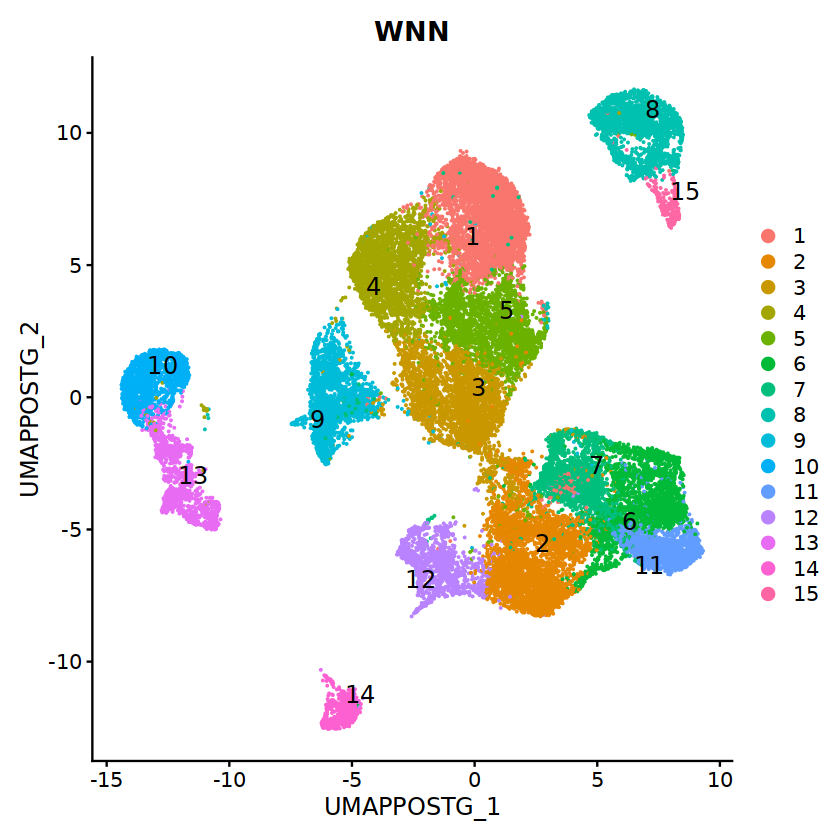

In [17]:
p3 <- DimPlot(adata, reduction = "UMAP_POST_G", group.by = "seurat_clusters", label = TRUE, label.size = 5, repel = TRUE) + ggtitle("WNN")
p3


In [18]:
setwd(path_graphs)
png(file='UMAP_POST_G_recluster_at_0.5.png')
p3
dev.off()

png 
  2

## Cell type distribution in cluster

### Integrated_annotation_after_rpca seurat_clusters time_point vs Diff

In [19]:
met<-adata[[]]

In [20]:
met.dt<-data.table(met,key=c("time_point","Integrated_annotation_after_rpca","seurat_clusters","Diff"))

In [21]:
#str(met.dt)

In [22]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.table)

'data.frame':	47 obs. of  5 variables:
 $ time_point                      : Ord.factor w/ 2 levels "0_days"<"8_days": 1 1 1 1 1 1 1 1 1 1 ...
 $ Integrated_annotation_after_rpca: Ord.factor w/ 6 levels "hESC"<"HemogenicEndothelium"<..: 1 1 1 1 1 1 1 1 1 3 ...
 $ seurat_clusters                 : Factor w/ 15 levels "1","2","3","4",..: 1 2 3 4 5 7 8 9 13 1 ...
 $ Diff                            : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1 1 1 1 1 1 1 1 1 ...
 $ Freq                            : int  3722 1 2783 2614 2359 3 1420 1949 7 7 ...


In [23]:
met.dt<-data.table(met, key=c("time_point","seurat_clusters","Diff"))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.TOTAL)

'data.frame':	24 obs. of  4 variables:
 $ time_point     : Ord.factor w/ 2 levels "0_days"<"8_days": 1 1 1 1 1 1 1 1 1 2 ...
 $ seurat_clusters: Factor w/ 15 levels "1","2","3","4",..: 1 2 3 4 5 7 8 9 13 1 ...
 $ Diff           : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1 1 1 1 1 1 1 1 1 ...
 $ TOTAL          : int  3729 1 2783 2615 2359 4 1420 1950 7 162 ...


In [24]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("time_point","seurat_clusters","Diff"))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [25]:
str(Freq.table)

'data.frame':	47 obs. of  7 variables:
 $ time_point                      : Ord.factor w/ 2 levels "0_days"<"8_days": 1 1 1 1 1 1 1 1 1 1 ...
 $ seurat_clusters                 : Factor w/ 15 levels "1","2","3","4",..: 1 1 13 2 3 4 4 5 7 7 ...
 $ Diff                            : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1 1 1 1 1 1 1 1 1 ...
 $ Integrated_annotation_after_rpca: Ord.factor w/ 6 levels "hESC"<"HemogenicEndothelium"<..: 1 3 1 1 1 1 3 1 3 1 ...
 $ Freq                            : int  3722 7 7 1 2783 2614 1 2359 1 3 ...
 $ TOTAL                           : int  3729 3729 7 1 2783 2615 2615 2359 4 4 ...
 $ Perc                            : num  99.81 0.19 100 100 100 ...


In [26]:
met.dt<-data.table(met, key=c("time_point","Diff"))
Freq.time_point<-as.data.frame(met.dt[,.(ntime=.N),by=key(met.dt)], stringsAsFactors=F)


str(Freq.time_point)

'data.frame':	2 obs. of  3 variables:
 $ time_point: Ord.factor w/ 2 levels "0_days"<"8_days": 1 2
 $ Diff      : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1
 $ ntime     : int  14868 15888


In [27]:
Freq.table<-merge(Freq.table,
                  Freq.time_point,
                  by=c("time_point","Diff"))

str(Freq.table)

'data.frame':	47 obs. of  8 variables:
 $ time_point                      : Ord.factor w/ 2 levels "0_days"<"8_days": 1 1 1 1 1 1 1 1 1 1 ...
 $ Diff                            : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1 1 1 1 1 1 1 1 1 ...
 $ seurat_clusters                 : Factor w/ 15 levels "1","2","3","4",..: 1 1 13 2 3 4 4 5 7 7 ...
 $ Integrated_annotation_after_rpca: Ord.factor w/ 6 levels "hESC"<"HemogenicEndothelium"<..: 1 3 1 1 1 1 3 1 3 1 ...
 $ Freq                            : int  3722 7 7 1 2783 2614 1 2359 1 3 ...
 $ TOTAL                           : int  3729 3729 7 1 2783 2615 2615 2359 4 4 ...
 $ Perc                            : num  99.81 0.19 100 100 100 ...
 $ ntime                           : int  14868 14868 14868 14868 14868 14868 14868 14868 14868 14868 ...


In [28]:
Freq.table_filtered<-Freq.table[which(Freq.table$TOTAL >= 50),]

str(Freq.table_filtered)

'data.frame':	39 obs. of  8 variables:
 $ time_point                      : Ord.factor w/ 2 levels "0_days"<"8_days": 1 1 1 1 1 1 1 1 1 2 ...
 $ Diff                            : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1 1 1 1 1 1 1 1 1 ...
 $ seurat_clusters                 : Factor w/ 15 levels "1","2","3","4",..: 1 1 3 4 4 5 8 9 9 1 ...
 $ Integrated_annotation_after_rpca: Ord.factor w/ 6 levels "hESC"<"HemogenicEndothelium"<..: 1 3 1 1 3 1 1 3 1 1 ...
 $ Freq                            : int  3722 7 2783 2614 1 2359 1420 1 1949 88 ...
 $ TOTAL                           : int  3729 3729 2783 2615 2615 2359 1420 1950 1950 162 ...
 $ Perc                            : num  99.81 0.19 100 99.96 0.04 ...
 $ ntime                           : int  14868 14868 14868 14868 14868 14868 14868 14868 14868 15888 ...


In [29]:
fill_colours<-c(brewer.pal(7, "Spectral"),brewer.pal(9, "Purples")[c(5,6)],brewer.pal(9, "Blues")[c(1:9)],brewer.pal(9, "BrBG")[c(3:4)],"gray")
    
length(fill_colours)

length(c("hESC","HemogenicEndothelium","MEP","early erythroid","late erythroid",
                                                 "early MK","MK","Mast cells","Classical monocytes",
                                                 "Double-negative thymocytes","gamma-delta T cells","ILC3","Regulatory T cells",
                                                 "Tem/Effector helper T cells","Type 17 helper T cells","Plasmablasts","NK cells","CD16- NK cells",
                                                 "Epithelial cells","Fibroblasts","unassigned"))


[1] 21

[1] 21

In [30]:
str(Freq.table_filtered)

'data.frame':	39 obs. of  8 variables:
 $ time_point                      : Ord.factor w/ 2 levels "0_days"<"8_days": 1 1 1 1 1 1 1 1 1 2 ...
 $ Diff                            : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1 1 1 1 1 1 1 1 1 ...
 $ seurat_clusters                 : Factor w/ 15 levels "1","2","3","4",..: 1 1 3 4 4 5 8 9 9 1 ...
 $ Integrated_annotation_after_rpca: Ord.factor w/ 6 levels "hESC"<"HemogenicEndothelium"<..: 1 3 1 1 3 1 1 3 1 1 ...
 $ Freq                            : int  3722 7 2783 2614 1 2359 1420 1 1949 88 ...
 $ TOTAL                           : int  3729 3729 2783 2615 2615 2359 1420 1950 1950 162 ...
 $ Perc                            : num  99.81 0.19 100 99.96 0.04 ...
 $ ntime                           : int  14868 14868 14868 14868 14868 14868 14868 14868 14868 15888 ...


-------------------------------------->	0 25 50 75 100


Warning message:
"The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead."
Warning message:
"The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead."


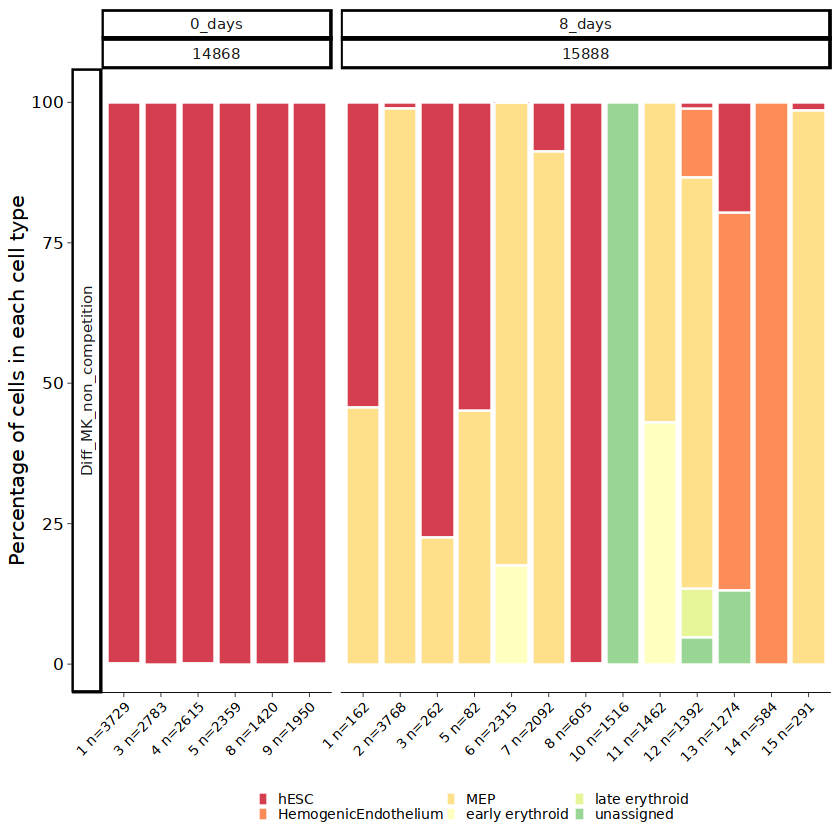

In [31]:
#### Stacked Graph #1---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-Freq.table_filtered %>%
    mutate(myaxis = paste0(seurat_clusters, " ", "n=", TOTAL), drop=F) %>%
    mutate(myaxis=fct_reorder(myaxis,as.numeric(seurat_clusters)), drop=F) %>%
    ggplot(aes(x=myaxis, y=Perc, fill=Integrated_annotation_after_rpca)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cell type",sep=" "),breaks=breaks.Rank,labels=labels.Rank,
                       limits=c(breaks.Rank[1],breaks.Rank[length(breaks.Rank)]+1))+
    scale_fill_manual(values=fill_colours,
                      drop=F,
                      name="Integrated_annotation_after_rpca")

 stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(Diff ~ time_point+ntime, scales='free_x', space='free_x', switch="y", 
               labeller=labeller(paste0(Freq.table_filtered$time_point, "\n", "n=", Freq.table_filtered$ntime, drop=T)))+   
    scale_x_discrete(name="Seurat cluster", drop=T)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=6),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=8,hjust=1,vjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=8, color="black", family="sans"),
                  legend.key.size = unit(0.25, 'cm'), #change legend key size
                  legend.key.height = unit(0.25, 'cm'), #change legend key height
                  legend.key.width = unit(0.25, 'cm'), #change legend key width
                  legend.position="bottom")



stacked_barplot

In [32]:
setwd(path_graphs)

svgname<-paste("POST_G_stacked_barplot_Diff_vs_time_point_seurat_clusters_vs_Integrated_annotation_after_rpca",".png",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="png")
}

Saving 6.67 x 6.67 in image


## Dotplot on markers

In [33]:
markers<-c('SOX2','SOX4','POU5F1',"KDR",'CDH5','CD34','GYPA','HBA2','HBZ','ITGA2B','GP1BA','GP1BB','TUBB1','CDKN2D','MAPK14','PTPRC','RAG1','RAG2','CD4','CD8A','CD8B','IL7R','CD3D','CD3E','CD3G','TRDC','GZMA')

In [34]:
# based on https://github.com/satijalab/seurat/issues/4688

In [35]:
summary(adata@meta.data$Diff)

Diff_MK_non_competition 
                  30756

Warning message:
"Found the following features in more than one assay, excluding the default. We will not include these in the final data frame: TRDC"
Warning message:
"The following requested variables were not found: TRDC"


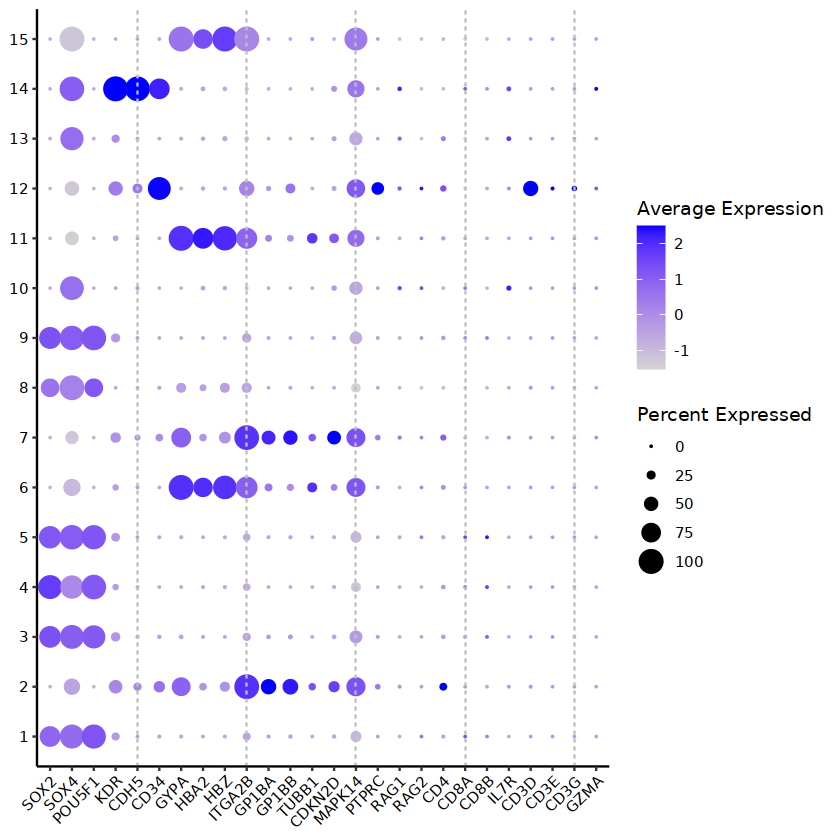

In [36]:
dotplot3<-DotPlot(
  adata,
  features=markers,
  assay = "SCT",
    group.by="seurat_clusters")+
geom_vline(xintercept=c(5,10,15,20,25,30,35), linetype="dashed", color="gray")+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans"))
dotplot3



In [37]:
setwd(path_graphs)
png(file='POST_G_Dotplot_seurat_clusters.png')
dotplot3
dev.off()

png 
  2

# Find clusters at higher resolution

cat("FindClusters\n")
  
  
adata <- FindClusters(adata, graph.name='integrated_nn_POST_G', 
                      algorithm=4, resolution = 2, verbose=FALSE, method = "igraph")
  

# Graphs post reclustering

path_graphs<-"/group/soranzo/manuel.tardaguila/2025_hESC_lymph_multiome/targeted_amplicon_GEX/cellranger/processing_outputs/graphs/"

if (file.exists(path_graphs)){

    }else{

    dir.create(path_graphs)
    }

## Wnn graphs 

## seurat_clusters

p3 <- DimPlot(adata, reduction = "UMAP_POST_G", group.by = "seurat_clusters", label = TRUE, label.size = 5, repel = TRUE) + ggtitle("WNN")
p3


setwd(path_graphs)
png(file='UMAP_POST_G_recluster_at_2.png')
p3
dev.off()

## Cell type distribution in cluster

### Integrated_annotation_after_rpca seurat_clusters time_point vs Diff

met<-adata[[]]

met.dt<-data.table(met,key=c("time_point","Integrated_annotation_after_rpca","seurat_clusters","Diff"))

#str(met.dt)

Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.table)

met.dt<-data.table(met, key=c("time_point","seurat_clusters","Diff"))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.TOTAL)

Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("time_point","seurat_clusters","Diff"))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

str(Freq.table)

met.dt<-data.table(met, key=c("time_point","Diff"))
Freq.time_point<-as.data.frame(met.dt[,.(ntime=.N),by=key(met.dt)], stringsAsFactors=F)


str(Freq.time_point)

Freq.table<-merge(Freq.table,
                  Freq.time_point,
                  by=c("time_point","Diff"))

str(Freq.table)

Freq.table_filtered<-Freq.table[which(Freq.table$TOTAL >= 50),]

str(Freq.table_filtered)

fill_colours<-c(brewer.pal(7, "Spectral"),brewer.pal(9, "Purples")[c(5,6)],brewer.pal(9, "Blues")[c(1:9)],brewer.pal(9, "BrBG")[c(3:4)],"gray")
    
length(fill_colours)

length(c("hESC","HemogenicEndothelium","MEP","early erythroid","late erythroid",
                                                 "early MK","MK","Mast cells","Classical monocytes",
                                                 "Double-negative thymocytes","gamma-delta T cells","ILC3","Regulatory T cells",
                                                 "Tem/Effector helper T cells","Type 17 helper T cells","Plasmablasts","NK cells","CD16- NK cells",
                                                 "Epithelial cells","Fibroblasts","unassigned"))


str(Freq.table_filtered)

#### Stacked Graph #1---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-Freq.table_filtered %>%
    mutate(myaxis = paste0(seurat_clusters, " ", "n=", TOTAL), drop=F) %>%
    mutate(myaxis=fct_reorder(myaxis,as.numeric(seurat_clusters)), drop=F) %>%
    ggplot(aes(x=myaxis, y=Perc, fill=Integrated_annotation_after_rpca)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cell type",sep=" "),breaks=breaks.Rank,labels=labels.Rank,
                       limits=c(breaks.Rank[1],breaks.Rank[length(breaks.Rank)]+1))+
    scale_fill_manual(values=fill_colours,
                      drop=F,
                      name="Integrated_annotation_after_rpca")

 stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(Diff ~ time_point+ntime, scales='free_x', space='free_x', switch="y", 
               labeller=labeller(paste0(Freq.table_filtered$time_point, "\n", "n=", Freq.table_filtered$ntime, drop=T)))+   
    scale_x_discrete(name="Seurat cluster", drop=T)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=6),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=8,hjust=1,vjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=8, color="black", family="sans"),
                  legend.key.size = unit(0.25, 'cm'), #change legend key size
                  legend.key.height = unit(0.25, 'cm'), #change legend key height
                  legend.key.width = unit(0.25, 'cm'), #change legend key width
                  legend.position="bottom")



stacked_barplot

setwd(path_graphs)

svgname<-paste("POST_G_stacked_barplot_Diff_vs_time_point_seurat_clusters_vs_Integrated_annotation_after_rpca_RES_2",".png",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="png")
}

## Dotplot on markers

markers<-c('SOX2','SOX4','POU5F1',"KDR",'CDH5','CD34','GYPA','HBA2','HBZ','ITGA2B','GP1BA','GP1BB','TUBB1','CDKN2D','MAPK14','PTPRC','RAG1','RAG2','CD4','CD8A','CD8B','IL7R','CD3D','CD3E','CD3G','TRDC','GZMA')

# based on https://github.com/satijalab/seurat/issues/4688

summary(adata@meta.data$Diff)

dotplot3<-DotPlot(
  adata,
  features=markers,
  assay = "SCT",
    group.by="seurat_clusters")+
geom_vline(xintercept=c(5,10,15,20,25,30,35), linetype="dashed", color="gray")+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans"))
dotplot3



setwd(path_graphs)
png(file='POST_G_Dotplot_Diff_MK_seurat_clusters_RES_2.png')
dotplot3
dev.off()

Warning message:
"Found the following features in more than one assay, excluding the default. We will not include these in the final data frame: TRDC"
Warning message:
"The following requested variables were not found: TRDC"


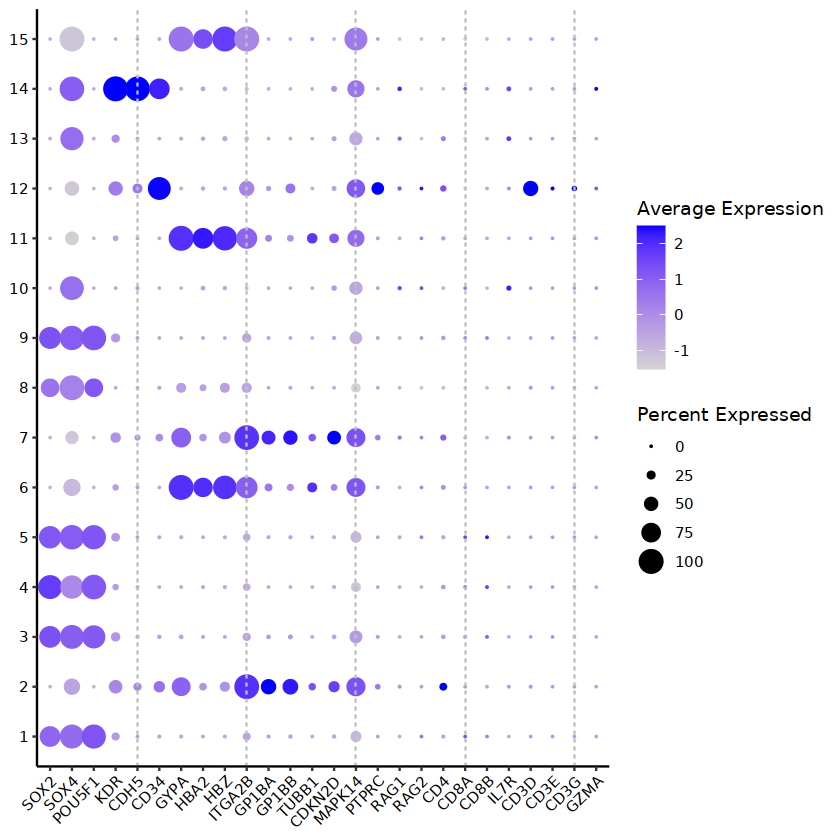

In [40]:
dotplot3<-DotPlot(
  adata,
  features=markers,
  assay = "SCT",
    group.by="seurat_clusters")+
geom_vline(xintercept=c(5,10,15,20,25,30,35), linetype="dashed", color="gray")+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans"))
dotplot3



In [41]:
setwd(path_graphs)
png(file='POST_G_Dotplot_Diff_lymph_seurat_clusters_RES_2.png')
dotplot3
dev.off()

png 
  2

In [42]:
colnames(adata@meta.data)

[1] "orig.ident"                          
 [2] "nCount_RNA"                          
 [3] "nFeature_RNA"                        
 [4] "nCount_RNA_raw"                      
 [5] "nFeature_RNA_raw"                    
 [6] "percent.mt"                          
 [7] "scDblFinder.class"                   
 [8] "scDblFinder.score"                   
 [9] "scDblFinder.weighted"                
[10] "scDblFinder.cxds_score"              
[11] "Diff"                                
[12] "nCount_SCT"                          
[13] "nFeature_SCT"                        
[14] "SCT_snn_res.2"                       
[15] "seurat_clusters"                     
[16] "SCT_snn_res.0.5"                     
[17] "CellTypist_label_Alsinet"            
[18] "CellTypist_conf_score_Alsinet"       
[19] "CellTypist_label_FBMA"               
[20] "CellTypist_conf_score_FBMA"          
[21] "CellTypist_label_Immune_ALL_low"     
[22] "CellTypist_conf_score_Immune_ALL_low"
[23] "Integrated_annotation"               
[24] "integrated_nn_res.0.5"               
[25] "Subclusters_2"                       
[26] "Subclusters_5"                       
[27] "Subclusters_7"                       
[28] "Subclusters_9"                       
[29] "Subclusters_10"                      
[30] "Subclusters_11"                      
[31] "Subclusters_13"                      
[32] "my_own_clusters"                     
[33] "Integrated_annotation_after_rpca"    
[34] "Assignation_demux_NO_CellBender"     
[35] "Assigned_GFPbc_demux__NO_CellBender" 
[36] "Assignation_demux_CellBender"        
[37] "Assigned_GFPbc_demux_CellBender"     
[38] "Assignation_GEX_not_amplified"       
[39] "time_point"                          
[40] "integrative_genotyping"              
[41] "clone_line"                          
[42] "Genotype"                            
[43] "SCT_SNN_res.0.5"

In [43]:
str(adata@meta.data$integrated_nn_POST_G_res.0.5)

 NULL


## Cell type distribution in cluster

### Integrated_annotation_after_rpca seurat_clusters time_point vs Diff

In [44]:
met<-adata[[]]

In [45]:
met.dt<-data.table(met,key=c("time_point","Integrated_annotation_after_rpca","seurat_clusters","Diff"))

In [46]:
#str(met.dt)

In [47]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.table)

'data.frame':	47 obs. of  5 variables:
 $ time_point                      : Ord.factor w/ 2 levels "0_days"<"8_days": 1 1 1 1 1 1 1 1 1 1 ...
 $ Integrated_annotation_after_rpca: Ord.factor w/ 6 levels "hESC"<"HemogenicEndothelium"<..: 1 1 1 1 1 1 1 1 1 3 ...
 $ seurat_clusters                 : Factor w/ 15 levels "1","2","3","4",..: 1 2 3 4 5 7 8 9 13 1 ...
 $ Diff                            : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1 1 1 1 1 1 1 1 1 ...
 $ Freq                            : int  3722 1 2783 2614 2359 3 1420 1949 7 7 ...


In [48]:
met.dt<-data.table(met, key=c("time_point","seurat_clusters","Diff"))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.TOTAL)

'data.frame':	24 obs. of  4 variables:
 $ time_point     : Ord.factor w/ 2 levels "0_days"<"8_days": 1 1 1 1 1 1 1 1 1 2 ...
 $ seurat_clusters: Factor w/ 15 levels "1","2","3","4",..: 1 2 3 4 5 7 8 9 13 1 ...
 $ Diff           : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1 1 1 1 1 1 1 1 1 ...
 $ TOTAL          : int  3729 1 2783 2615 2359 4 1420 1950 7 162 ...


In [49]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("time_point","seurat_clusters","Diff"))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [50]:
str(Freq.table)

'data.frame':	47 obs. of  7 variables:
 $ time_point                      : Ord.factor w/ 2 levels "0_days"<"8_days": 1 1 1 1 1 1 1 1 1 1 ...
 $ seurat_clusters                 : Factor w/ 15 levels "1","2","3","4",..: 1 1 13 2 3 4 4 5 7 7 ...
 $ Diff                            : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1 1 1 1 1 1 1 1 1 ...
 $ Integrated_annotation_after_rpca: Ord.factor w/ 6 levels "hESC"<"HemogenicEndothelium"<..: 1 3 1 1 1 1 3 1 3 1 ...
 $ Freq                            : int  3722 7 7 1 2783 2614 1 2359 1 3 ...
 $ TOTAL                           : int  3729 3729 7 1 2783 2615 2615 2359 4 4 ...
 $ Perc                            : num  99.81 0.19 100 100 100 ...


In [51]:
met.dt<-data.table(met, key=c("time_point","Diff"))
Freq.time_point<-as.data.frame(met.dt[,.(ntime=.N),by=key(met.dt)], stringsAsFactors=F)


str(Freq.time_point)

'data.frame':	2 obs. of  3 variables:
 $ time_point: Ord.factor w/ 2 levels "0_days"<"8_days": 1 2
 $ Diff      : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1
 $ ntime     : int  14868 15888


In [52]:
Freq.table<-merge(Freq.table,
                  Freq.time_point,
                  by=c("time_point","Diff"))

str(Freq.table)

'data.frame':	47 obs. of  8 variables:
 $ time_point                      : Ord.factor w/ 2 levels "0_days"<"8_days": 1 1 1 1 1 1 1 1 1 1 ...
 $ Diff                            : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1 1 1 1 1 1 1 1 1 ...
 $ seurat_clusters                 : Factor w/ 15 levels "1","2","3","4",..: 1 1 13 2 3 4 4 5 7 7 ...
 $ Integrated_annotation_after_rpca: Ord.factor w/ 6 levels "hESC"<"HemogenicEndothelium"<..: 1 3 1 1 1 1 3 1 3 1 ...
 $ Freq                            : int  3722 7 7 1 2783 2614 1 2359 1 3 ...
 $ TOTAL                           : int  3729 3729 7 1 2783 2615 2615 2359 4 4 ...
 $ Perc                            : num  99.81 0.19 100 100 100 ...
 $ ntime                           : int  14868 14868 14868 14868 14868 14868 14868 14868 14868 14868 ...


In [53]:
Freq.table_filtered<-Freq.table[which(Freq.table$TOTAL >= 5),]

str(Freq.table_filtered)

'data.frame':	44 obs. of  8 variables:
 $ time_point                      : Ord.factor w/ 2 levels "0_days"<"8_days": 1 1 1 1 1 1 1 1 1 1 ...
 $ Diff                            : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1 1 1 1 1 1 1 1 1 ...
 $ seurat_clusters                 : Factor w/ 15 levels "1","2","3","4",..: 1 1 13 3 4 4 5 8 9 9 ...
 $ Integrated_annotation_after_rpca: Ord.factor w/ 6 levels "hESC"<"HemogenicEndothelium"<..: 1 3 1 1 1 3 1 1 3 1 ...
 $ Freq                            : int  3722 7 7 2783 2614 1 2359 1420 1 1949 ...
 $ TOTAL                           : int  3729 3729 7 2783 2615 2615 2359 1420 1950 1950 ...
 $ Perc                            : num  99.81 0.19 100 100 99.96 ...
 $ ntime                           : int  14868 14868 14868 14868 14868 14868 14868 14868 14868 14868 ...


In [54]:
fill_colours<-c(brewer.pal(7, "Spectral"),brewer.pal(9, "Purples")[c(5,6)],brewer.pal(9, "Blues")[c(1:9)],brewer.pal(9, "BrBG")[c(3:4)],"gray")
    
length(fill_colours)

length(c("hESC","HemogenicEndothelium","MEP","early erythroid","late erythroid",
                                                 "early MK","MK","Mast cells","Classical monocytes",
                                                 "Double-negative thymocytes","gamma-delta T cells","ILC3","Regulatory T cells",
                                                 "Tem/Effector helper T cells","Type 17 helper T cells","Plasmablasts","NK cells","CD16- NK cells",
                                                 "Epithelial cells","Fibroblasts","unassigned"))


[1] 21

[1] 21

In [55]:
str(Freq.table_filtered)

'data.frame':	44 obs. of  8 variables:
 $ time_point                      : Ord.factor w/ 2 levels "0_days"<"8_days": 1 1 1 1 1 1 1 1 1 1 ...
 $ Diff                            : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1 1 1 1 1 1 1 1 1 ...
 $ seurat_clusters                 : Factor w/ 15 levels "1","2","3","4",..: 1 1 13 3 4 4 5 8 9 9 ...
 $ Integrated_annotation_after_rpca: Ord.factor w/ 6 levels "hESC"<"HemogenicEndothelium"<..: 1 3 1 1 1 3 1 1 3 1 ...
 $ Freq                            : int  3722 7 7 2783 2614 1 2359 1420 1 1949 ...
 $ TOTAL                           : int  3729 3729 7 2783 2615 2615 2359 1420 1950 1950 ...
 $ Perc                            : num  99.81 0.19 100 100 99.96 ...
 $ ntime                           : int  14868 14868 14868 14868 14868 14868 14868 14868 14868 14868 ...


-------------------------------------->	0 25 50 75 100


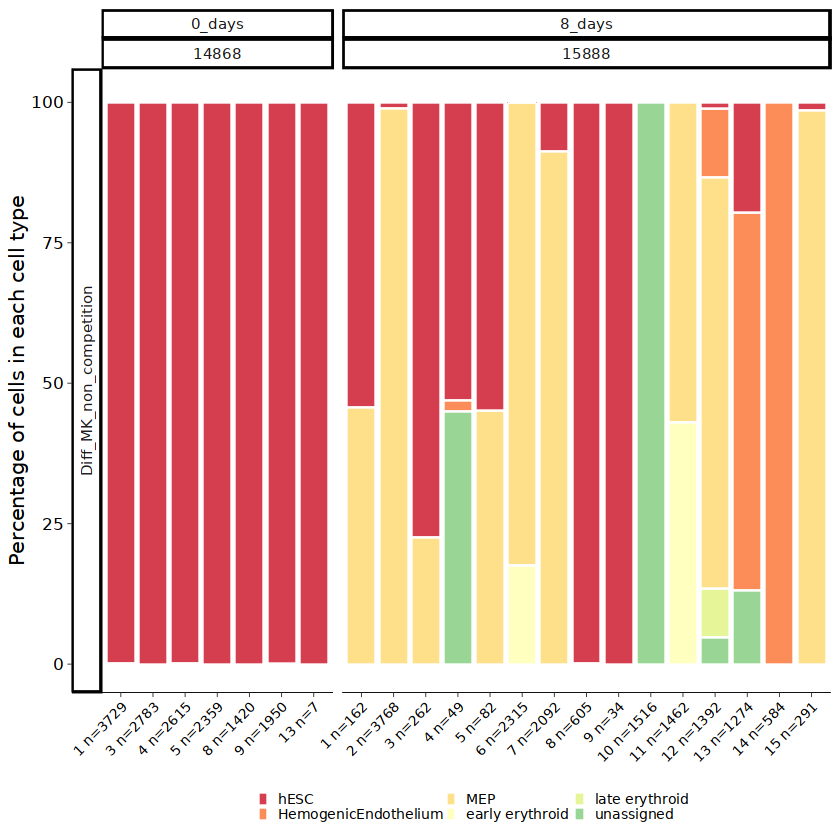

In [56]:
#### Stacked Graph #1---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-Freq.table_filtered %>%
    mutate(myaxis = paste0(seurat_clusters, " ", "n=", TOTAL), drop=F) %>%
    mutate(myaxis=fct_reorder(myaxis,as.numeric(seurat_clusters)), drop=F) %>%
    ggplot(aes(x=myaxis, y=Perc, fill=Integrated_annotation_after_rpca)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cell type",sep=" "),breaks=breaks.Rank,labels=labels.Rank,
                       limits=c(breaks.Rank[1],breaks.Rank[length(breaks.Rank)]+1))+
    scale_fill_manual(values=fill_colours,
                      drop=F,
                      name="Integrated_annotation_after_rpca")

 stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(Diff ~ time_point+ntime, scales='free_x', space='free_x', switch="y", 
               labeller=labeller(paste0(Freq.table_filtered$time_point, "\n", "n=", Freq.table_filtered$ntime, drop=T)))+   
    scale_x_discrete(name="Seurat cluster", drop=T)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=6),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=8,hjust=1,vjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=8, color="black", family="sans"),
                  legend.key.size = unit(0.25, 'cm'), #change legend key size
                  legend.key.height = unit(0.25, 'cm'), #change legend key height
                  legend.key.width = unit(0.25, 'cm'), #change legend key width
                  legend.position="bottom")



stacked_barplot

In [57]:
setwd(path_graphs)

svgname<-paste("POST_G_stacked_barplot_Diff_vs_time_point_seurat_clusters_vs_Integrated_annotation_after_rpca",".png",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="png")
}

Saving 6.67 x 6.67 in image


# Updated decision after looking at the DE plots

## Clusters 10, 13, 8 and 15 go to unassigned cells

In [179]:
adata@meta.data$Integrated_annotation_after_rpca<-as.character(adata@meta.data$Integrated_annotation_after_rpca)

### idx.reassign

In [180]:
idx.reassign<-which(adata@meta.data$seurat_clusters%in%c('10','13','8','15'))

str(idx.reassign)
cat("\n")

 int [1:5113] 1 3 7 8 10 12 19 40 43 49 ...



In [181]:
adata@meta.data$Integrated_annotation_after_rpca[idx.reassign]<-"unassigned"

In [182]:
adata@meta.data$Integrated_annotation_after_rpca<-droplevels(factor(adata@meta.data$Integrated_annotation_after_rpca,
                                       levels = c("hESC","HemogenicEndothelium","MEP","early erythroid","late erythroid",
                                                 "early MK","MK","Mast cells","Classical monocytes",
                                                 "Double-negative thymocytes","gamma-delta T cells","ILC3","Regulatory T cells",
                                                 "Tem/Effector helper T cells","Type 17 helper T cells","Plasmablasts","NK cells","CD16- NK cells",
                                                 "Epithelial cells","Fibroblasts","unassigned"),
                                       ordered=T))

summary(adata@meta.data$Integrated_annotation_after_rpca)

hESC HemogenicEndothelium                  MEP 
               14069                  756                 9571 
     early erythroid       late erythroid           unassigned 
                1038                  122                 5200

# FINAL GRAPHS

In [183]:
path_graphs<-"/group/soranzo/manuel.tardaguila/2025_hESC_MK_SCRNAseq_10X/no_competition/FINAL_GRAPHS/"

In [184]:
if (file.exists(path_graphs)){

    }else{

    dir.create(path_graphs)
    }

NULL

In [185]:
adata

An object of class Seurat 
103847 features across 30756 samples within 4 assays 
Active assay: SCT (28073 features, 0 variable features)
 3 layers present: counts, data, scale.data
 3 other assays present: RNA, RNA_raw, integrated
 2 dimensional reductions calculated: PCA_POST_G, UMAP_POST_G

## New vector colors

In [186]:
levels(adata@meta.data$Integrated_annotation_after_rpca)

[1] "hESC"                 "HemogenicEndothelium" "MEP"                 
[4] "early erythroid"      "late erythroid"       "unassigned"

In [187]:
vector_colors<-rep(NA, length(levels(adata@meta.data$Integrated_annotation_after_rpca)))

str(vector_colors)

 logi [1:6] NA NA NA NA NA NA


In [188]:
vector_colors[c(1:6)]<-brewer.pal(9, "Set1")[c(1:6)]

str(vector_colors)

 chr [1:6] "#E41A1C" "#377EB8" "#4DAF4A" "#984EA3" "#FF7F00" "#FFFF33"


In [189]:
names(vector_colors)[c(1:6)]<-levels(adata@meta.data$Integrated_annotation_after_rpca)[c(1:6)]

In [190]:
vector_colors

hESC HemogenicEndothelium                  MEP 
           "#E41A1C"            "#377EB8"            "#4DAF4A" 
     early erythroid       late erythroid           unassigned 
           "#984EA3"            "#FF7F00"            "#FFFF33"

lymphoid_lineage<-c('Double-negative thymocytes','gamma-delta T cells','ILC3','Regulatory T cells','Tem/Effector helper T cells','Type 17 helper T cells','Plasmablasts')

str(lymphoid_lineage)

names(vector_colors)[c(10:16)]<-lymphoid_lineage

vector_colors[c(10:16)]<-brewer.pal(9, "Purples")[3:9]


vector_colors

nks<-c('CD16- NK cells','NK cells')

names(vector_colors)[c(17:18)]<-nks

vector_colors[c(17:18)]<-brewer.pal(9, "Oranges")[c(5,7)]


vector_colors

names(vector_colors)[c(19)]<-'Fibroblasts'

vector_colors[c(19)]<-'gray'

vector_colors

## Wnn graphs 

### orig.ident

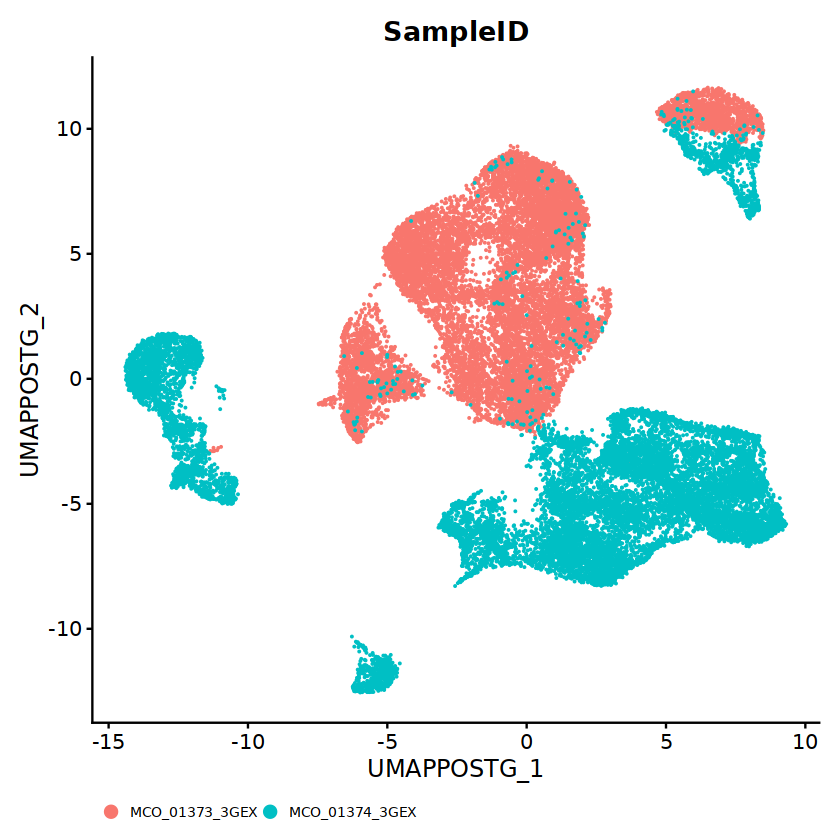

In [191]:
p3 <- DimPlot(adata, reduction = "UMAP_POST_G", group.by = "orig.ident", 
              label = FALSE) 

p3<-p3+
    ggtitle("SampleID")+
    theme(legend.title = element_blank(),
                  legend.text = element_text(size=8, color="black", family="sans"),
                  legend.key.size = unit(0.25, 'cm'), #change legend key size
                  legend.key.height = unit(0.25, 'cm'), #change legend key height
                  legend.key.width = unit(0.25, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=5,byrow=TRUE))

p3

#LabelClusters(p3, id = "Integrated_annotation_after_rpca",  fontface = "bold", color = "black")+

In [192]:
setwd(path_graphs)
png(file='UMAP_POST_G_sampleID.png')
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

png 
  2

### seurat_clusters

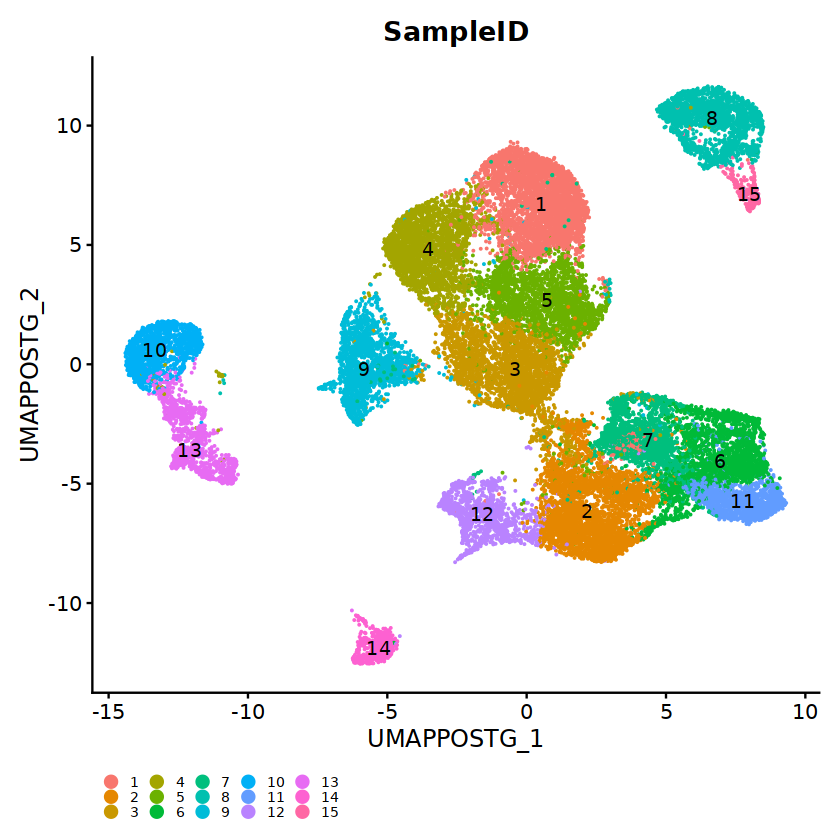

In [193]:
p3 <- DimPlot(adata, reduction = "UMAP_POST_G", group.by = "seurat_clusters", 
              label = TRUE) 

p3<-p3+
    ggtitle("SampleID")+
    theme(legend.title = element_blank(),
                  legend.text = element_text(size=8, color="black", family="sans"),
                  legend.key.size = unit(0.25, 'cm'), #change legend key size
                  legend.key.height = unit(0.25, 'cm'), #change legend key height
                  legend.key.width = unit(0.25, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=5,byrow=TRUE))

p3

#LabelClusters(p3, id = "Integrated_annotation_after_rpca",  fontface = "bold", color = "black")+

In [194]:
setwd(path_graphs)
png(file='UMAP_POST_G_seurat_clusters.png')
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

png 
  2

### Integrated_annotation_after_rpca

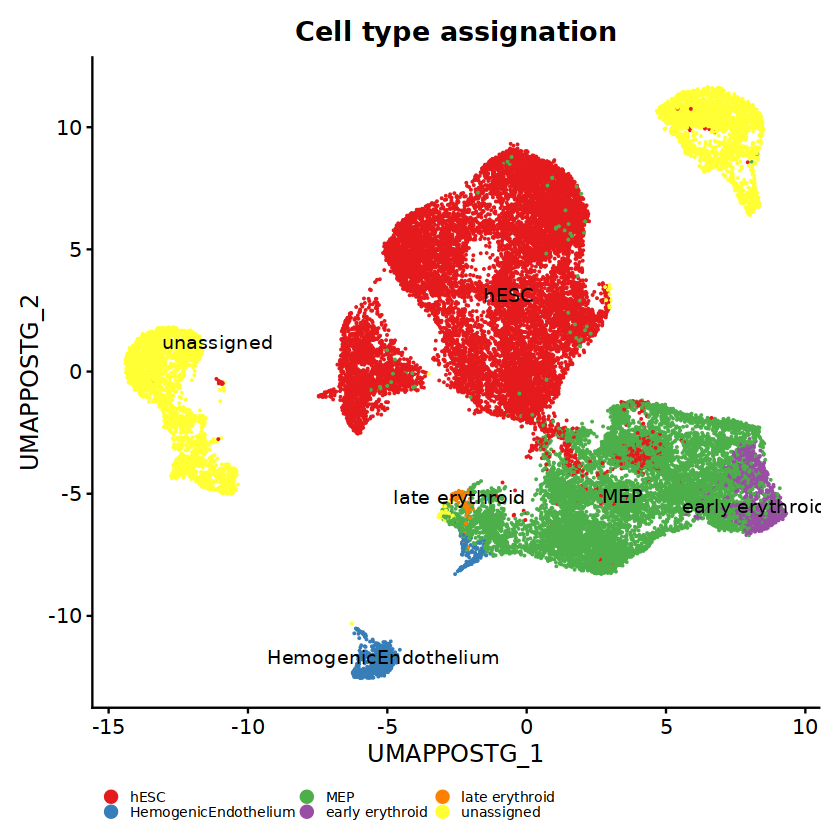

In [195]:
p3 <- DimPlot(adata, reduction = "UMAP_POST_G", group.by = "Integrated_annotation_after_rpca", 
              label = TRUE, cols=vector_colors) 

p3<-p3+
    ggtitle("Cell type assignation")+
    theme(legend.title = element_blank(),
                  legend.text = element_text(size=8, color="black", family="sans"),
                  legend.key.size = unit(0.25, 'cm'), #change legend key size
                  legend.key.height = unit(0.25, 'cm'), #change legend key height
                  legend.key.width = unit(0.25, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=5,byrow=TRUE))

p3

#LabelClusters(p3, id = "Integrated_annotation_after_rpca",  fontface = "bold", color = "black")+

In [196]:
setwd(path_graphs)
png(file='UMAP_POST_G_Integrated_annotation_after_rpca.png')
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

png 
  2

### Graph WNN by marker genes

In [197]:
DefaultAssay(adata) <- 'SCT'

genes<-Features(adata)

str(genes)

 chr [1:28073] "MIR1302-2HG" "AL627309.1" "AL627309.3" "AL627309.5" ...


In [198]:
genes[grep("GZM", genes)]

[1] "GZMM" "GZMA"

In [199]:
genes[grep("IFNG", genes)]

[1] "IFNGR1"   "IFNG-AS1" "IFNGR2"

Warning message:
"No layers found matching search pattern provided"
Warning message:
"Could not find CXCR6 in the default search locations, found in 'RNA_raw' assay instead"
Warning message:
"No layers found matching search pattern provided"
Warning message:
"Could not find GZMB in the default search locations, found in 'RNA_raw' assay instead"
Warning message:
"All cells have the same value (0) of "rnaraw_GZMB""


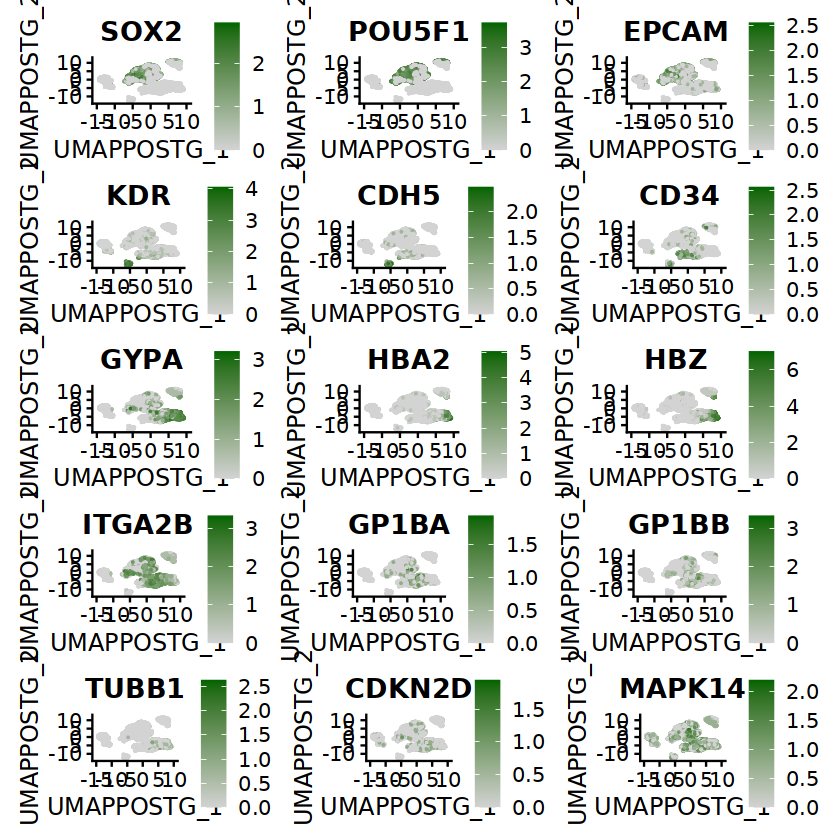

In [200]:
## Graph 

DefaultAssay(adata) <- 'SCT'


p5 <- FeaturePlot(adata, features = c('SOX2','POU5F1','EPCAM'),
                  reduction = 'UMAP_POST_G', 
                  cols = c("lightgrey","darkgreen"), ncol = 3)

p5_B <- FeaturePlot(adata, features = c("KDR",'CDH5','CD34'),
                  reduction = 'UMAP_POST_G', 
                  cols = c("lightgrey","darkgreen"), ncol = 3)
p5_1 <- FeaturePlot(adata, features = c('GYPA','HBA2','HBZ'),
                    reduction = 'UMAP_POST_G', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p5_3 <- FeaturePlot(adata, features = c('ITGA2B','GP1BA', 'GP1BB'),
                    reduction = 'UMAP_POST_G', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p_6 <- FeaturePlot(adata, features = c('TUBB1','CDKN2D','MAPK14'),
                    reduction = 'UMAP_POST_G', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p_7 <- FeaturePlot(adata, features = c('PTPRC','CD3E','CXCR6'),
                    reduction = 'UMAP_POST_G', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p_8 <- FeaturePlot(adata, features = c('GZMA','GZMB','GZMM'),
                    reduction = 'UMAP_POST_G', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p5 / p5_B / p5_1 / p5_3 / p_6 #/ p_7 / p_8



In [201]:
setwd(path_graphs)
png(file='UMAP_marker_genes.png', width =1000, height = 1250)
p5 / p5_B / p5_1 / p5_3 / p_6 #/ p_7 / p_8
dev.off()

png 
  2

## Cell type distribution in cluster

### Integrated_annotation_after_rpca Integrated_annotation_after_rpca time_point vs Diff

In [202]:
met<-adata[[]]

In [203]:
colnames(met)

[1] "orig.ident"                          
 [2] "nCount_RNA"                          
 [3] "nFeature_RNA"                        
 [4] "nCount_RNA_raw"                      
 [5] "nFeature_RNA_raw"                    
 [6] "percent.mt"                          
 [7] "scDblFinder.class"                   
 [8] "scDblFinder.score"                   
 [9] "scDblFinder.weighted"                
[10] "scDblFinder.cxds_score"              
[11] "Diff"                                
[12] "nCount_SCT"                          
[13] "nFeature_SCT"                        
[14] "SCT_snn_res.2"                       
[15] "seurat_clusters"                     
[16] "SCT_snn_res.0.5"                     
[17] "CellTypist_label_Alsinet"            
[18] "CellTypist_conf_score_Alsinet"       
[19] "CellTypist_label_FBMA"               
[20] "CellTypist_conf_score_FBMA"          
[21] "CellTypist_label_Immune_ALL_low"     
[22] "CellTypist_conf_score_Immune_ALL_low"
[23] "Integrated_annotation"               
[24] "integrated_nn_res.0.5"               
[25] "Subclusters_2"                       
[26] "Subclusters_5"                       
[27] "Subclusters_7"                       
[28] "Subclusters_9"                       
[29] "Subclusters_10"                      
[30] "Subclusters_11"                      
[31] "Subclusters_13"                      
[32] "my_own_clusters"                     
[33] "Integrated_annotation_after_rpca"    
[34] "Assignation_demux_NO_CellBender"     
[35] "Assigned_GFPbc_demux__NO_CellBender" 
[36] "Assignation_demux_CellBender"        
[37] "Assigned_GFPbc_demux_CellBender"     
[38] "Assignation_GEX_not_amplified"       
[39] "time_point"                          
[40] "integrative_genotyping"              
[41] "clone_line"                          
[42] "Genotype"                            
[43] "SCT_SNN_res.0.5"

In [204]:
met.dt<-data.table(met,key=c("time_point","clone_line","Integrated_annotation_after_rpca","Diff"))

In [205]:
#str(met.dt)

In [206]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.table)

'data.frame':	95 obs. of  5 variables:
 $ time_point                      : Ord.factor w/ 2 levels "0_days"<"8_days": 1 1 1 1 1 1 1 1 1 1 ...
 $ clone_line                      : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 1 1 1 2 2 2 3 3 3 4 ...
 $ Integrated_annotation_after_rpca: Ord.factor w/ 6 levels "hESC"<"HemogenicEndothelium"<..: 1 3 6 1 3 6 1 3 6 1 ...
 $ Diff                            : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1 1 1 1 1 1 1 1 1 ...
 $ Freq                            : int  491 3 61 1555 1 214 879 1 114 1234 ...


In [207]:
met.dt<-data.table(met, key=c("time_point","Integrated_annotation_after_rpca","Diff"))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.TOTAL)

'data.frame':	9 obs. of  4 variables:
 $ time_point                      : Ord.factor w/ 2 levels "0_days"<"8_days": 1 1 1 2 2 2 2 2 2
 $ Integrated_annotation_after_rpca: Ord.factor w/ 6 levels "hESC"<"HemogenicEndothelium"<..: 1 3 6 1 2 3 4 5 6
 $ Diff                            : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1 1 1 1 1 1 1 1
 $ TOTAL                           : int  13431 10 1427 638 756 9561 1038 122 3773


In [208]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("time_point","Integrated_annotation_after_rpca","Diff"))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [209]:
str(Freq.table)

'data.frame':	95 obs. of  7 variables:
 $ time_point                      : Ord.factor w/ 2 levels "0_days"<"8_days": 1 1 1 1 1 1 1 1 1 1 ...
 $ Integrated_annotation_after_rpca: Ord.factor w/ 6 levels "hESC"<"HemogenicEndothelium"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Diff                            : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1 1 1 1 1 1 1 1 1 ...
 $ clone_line                      : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 1 6 12 2 7 4 3 10 5 11 ...
 $ Freq                            : int  491 2054 1657 1555 1761 1234 879 1451 226 270 ...
 $ TOTAL                           : int  13431 13431 13431 13431 13431 13431 13431 13431 13431 13431 ...
 $ Perc                            : num  3.66 15.29 12.34 11.58 13.11 ...


In [210]:
met.dt<-data.table(met, key=c("time_point","Diff"))
Freq.time_point<-as.data.frame(met.dt[,.(ntime=.N),by=key(met.dt)], stringsAsFactors=F)


str(Freq.time_point)

'data.frame':	2 obs. of  3 variables:
 $ time_point: Ord.factor w/ 2 levels "0_days"<"8_days": 1 2
 $ Diff      : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1
 $ ntime     : int  14868 15888


In [211]:
Freq.table<-merge(Freq.table,
                  Freq.time_point,
                  by=c("time_point","Diff"))

str(Freq.table)

'data.frame':	95 obs. of  8 variables:
 $ time_point                      : Ord.factor w/ 2 levels "0_days"<"8_days": 1 1 1 1 1 1 1 1 1 1 ...
 $ Diff                            : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1 1 1 1 1 1 1 1 1 ...
 $ Integrated_annotation_after_rpca: Ord.factor w/ 6 levels "hESC"<"HemogenicEndothelium"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ clone_line                      : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 1 6 12 2 7 4 3 10 5 11 ...
 $ Freq                            : int  491 2054 1657 1555 1761 1234 879 1451 226 270 ...
 $ TOTAL                           : int  13431 13431 13431 13431 13431 13431 13431 13431 13431 13431 ...
 $ Perc                            : num  3.66 15.29 12.34 11.58 13.11 ...
 $ ntime                           : int  14868 14868 14868 14868 14868 14868 14868 14868 14868 14868 ...


In [212]:
Freq.table_filtered<-Freq.table[which(Freq.table$TOTAL >= 1),]

str(Freq.table_filtered)

'data.frame':	95 obs. of  8 variables:
 $ time_point                      : Ord.factor w/ 2 levels "0_days"<"8_days": 1 1 1 1 1 1 1 1 1 1 ...
 $ Diff                            : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1 1 1 1 1 1 1 1 1 ...
 $ Integrated_annotation_after_rpca: Ord.factor w/ 6 levels "hESC"<"HemogenicEndothelium"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ clone_line                      : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 1 6 12 2 7 4 3 10 5 11 ...
 $ Freq                            : int  491 2054 1657 1555 1761 1234 879 1451 226 270 ...
 $ TOTAL                           : int  13431 13431 13431 13431 13431 13431 13431 13431 13431 13431 ...
 $ Perc                            : num  3.66 15.29 12.34 11.58 13.11 ...
 $ ntime                           : int  14868 14868 14868 14868 14868 14868 14868 14868 14868 14868 ...


In [213]:
fill_colours<-c(brewer.pal(9, "Greens")[c(5,6,7)],brewer.pal(9, "Reds")[c(5,6,7)],brewer.pal(9, "Purples")[c(5,6,7)],brewer.pal(9, "PuRd")[c(5,6,7)],'gray','black')

In [214]:
str(Freq.table_filtered)

'data.frame':	95 obs. of  8 variables:
 $ time_point                      : Ord.factor w/ 2 levels "0_days"<"8_days": 1 1 1 1 1 1 1 1 1 1 ...
 $ Diff                            : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1 1 1 1 1 1 1 1 1 ...
 $ Integrated_annotation_after_rpca: Ord.factor w/ 6 levels "hESC"<"HemogenicEndothelium"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ clone_line                      : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 1 6 12 2 7 4 3 10 5 11 ...
 $ Freq                            : int  491 2054 1657 1555 1761 1234 879 1451 226 270 ...
 $ TOTAL                           : int  13431 13431 13431 13431 13431 13431 13431 13431 13431 13431 ...
 $ Perc                            : num  3.66 15.29 12.34 11.58 13.11 ...
 $ ntime                           : int  14868 14868 14868 14868 14868 14868 14868 14868 14868 14868 ...


-------------------------------------->	0 25 50 75 100


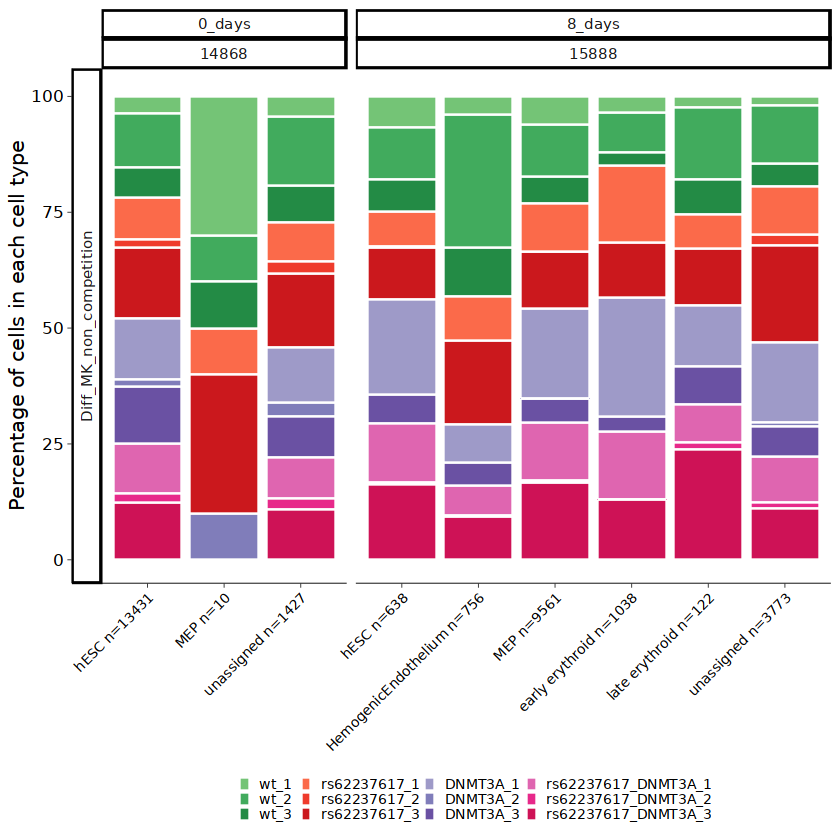

In [215]:
#### Stacked Graph #1---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-Freq.table_filtered %>%
    mutate(myaxis = paste0(Integrated_annotation_after_rpca, " ", "n=", TOTAL), drop=F) %>%
    mutate(myaxis=fct_reorder(myaxis,as.numeric(Integrated_annotation_after_rpca)), drop=F) %>%
    ggplot(aes(x=myaxis, y=Perc, fill=clone_line)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cell type",sep=" "),breaks=breaks.Rank,labels=labels.Rank,
                       limits=c(breaks.Rank[1],breaks.Rank[length(breaks.Rank)]+1))+
    scale_fill_manual(values=fill_colours,
                      drop=F,
                      name="Integrated_annotation_after_rpca")

 stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(Diff ~ time_point+ntime, scales='free_x', space='free_x', switch="y", 
               labeller=labeller(paste0(Freq.table_filtered$time_point, "\n", "n=", Freq.table_filtered$ntime, drop=T)))+   
    scale_x_discrete(name="Seurat cluster", drop=T)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=6),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=8,hjust=1,vjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=8, color="black", family="sans"),
                  legend.key.size = unit(0.25, 'cm'), #change legend key size
                  legend.key.height = unit(0.25, 'cm'), #change legend key height
                  legend.key.width = unit(0.25, 'cm'), #change legend key width
                  legend.position="bottom")



stacked_barplot

In [216]:
setwd(path_graphs)

svgname<-paste("POST_G_stacked_barplot_Diff_vs_time_point_Integrated_annotation_after_rpca_vs_clone_line",".png",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="png")
}

Saving 6.67 x 6.67 in image


## Dotplot on markers

In [217]:
markers<-c('SOX2','SOX4','POU5F1',"KDR",'CDH5','CD34','GYPA','HBA2','HBZ','ITGA2B','GP1BA','GP1BB','TUBB1','CDKN2D','MAPK14','PTPRC','RAG1','RAG2','CD3E','CD14','TPSB2','NCAM1','NKG7','PRF1')

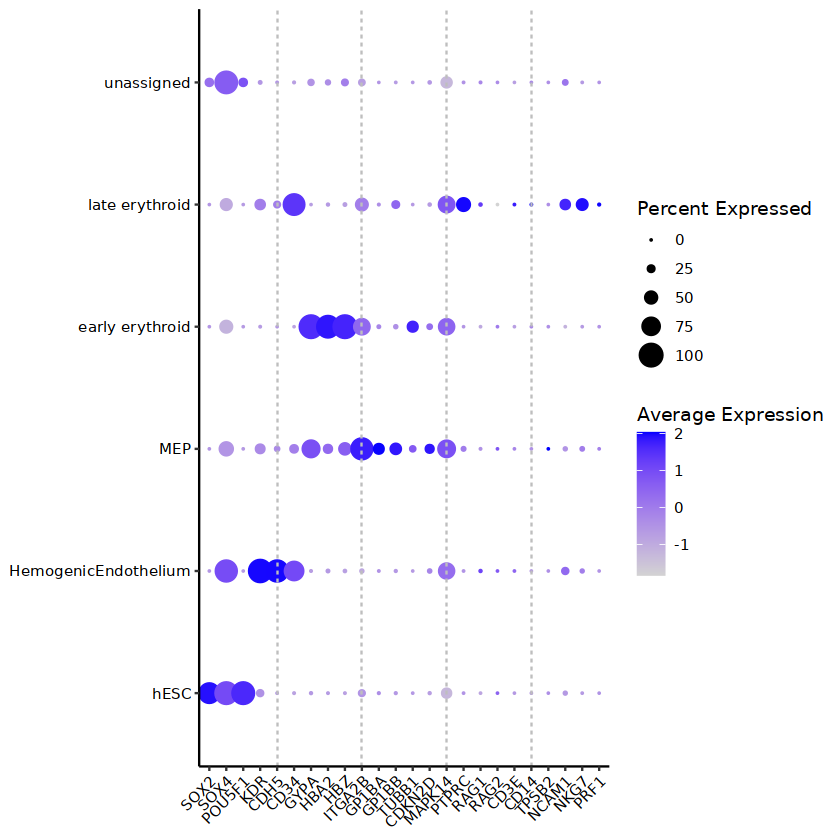

In [218]:
dotplot3<-DotPlot(
  adata,
  features=markers,
  assay = "SCT",
    group.by="Integrated_annotation_after_rpca")+
geom_vline(xintercept=c(5,10,15,20,25,30,35), linetype="dashed", color="gray")+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans"))
dotplot3



In [219]:
setwd(path_graphs)

svgname<-paste("POST_G_Dotplot_Integrated_annotation_after_rpca_MARKERS",".png",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= dotplot3,
         device="png")
}

Saving 6.67 x 6.67 in image


In [220]:
new_markers<-c('PTPRC','CD14','S100A9','S100A12','TPSB2','TPSAB1','RAG1','RAG2','CD4','CD8A','CD8B','IL7R','CD3D','CD3E','CD3G','TRDC','GZMA','GZMB','GZMK','PRF1','GNLY','NCAM1','IFNG','TYROBP','NKG7','RORC','PCDH9','KIT','LST1','CD160','FCGR3A','FCER1A','FOXP3','IL2RA','IL17B','TBX21','CD79A','JCHAIN')

Warning message:
"Found the following features in more than one assay, excluding the default. We will not include these in the final data frame: TPSAB1, TRDC, GZMB, GZMK, IFNG, FCGR3A, TBX21"
Warning message:
"The following requested variables were not found: TPSAB1, TRDC, GZMB, GZMK, IFNG, FCGR3A, TBX21"


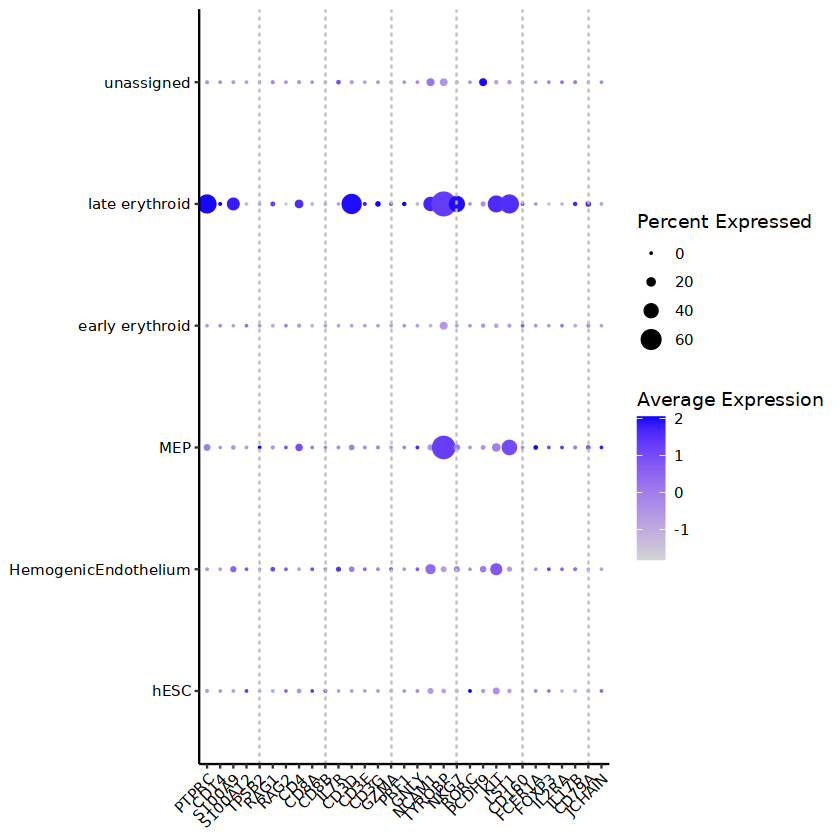

In [221]:
dotplot3<-DotPlot(
  adata,
  features=new_markers,
  assay = "SCT",
    group.by="Integrated_annotation_after_rpca")+
geom_vline(xintercept=c(5,10,15,20,25,30,35), linetype="dashed", color="gray")+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans"))
dotplot3



In [222]:
setwd(path_graphs)

svgname<-paste("POST_G_Dotplot_Integrated_annotation_after_rpca_NEW_MARKERS",".png",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= dotplot3,
         device="png")
}

Saving 6.67 x 6.67 in image


In [223]:
colnames(adata@meta.data)

[1] "orig.ident"                          
 [2] "nCount_RNA"                          
 [3] "nFeature_RNA"                        
 [4] "nCount_RNA_raw"                      
 [5] "nFeature_RNA_raw"                    
 [6] "percent.mt"                          
 [7] "scDblFinder.class"                   
 [8] "scDblFinder.score"                   
 [9] "scDblFinder.weighted"                
[10] "scDblFinder.cxds_score"              
[11] "Diff"                                
[12] "nCount_SCT"                          
[13] "nFeature_SCT"                        
[14] "SCT_snn_res.2"                       
[15] "seurat_clusters"                     
[16] "SCT_snn_res.0.5"                     
[17] "CellTypist_label_Alsinet"            
[18] "CellTypist_conf_score_Alsinet"       
[19] "CellTypist_label_FBMA"               
[20] "CellTypist_conf_score_FBMA"          
[21] "CellTypist_label_Immune_ALL_low"     
[22] "CellTypist_conf_score_Immune_ALL_low"
[23] "Integrated_annotation"               
[24] "integrated_nn_res.0.5"               
[25] "Subclusters_2"                       
[26] "Subclusters_5"                       
[27] "Subclusters_7"                       
[28] "Subclusters_9"                       
[29] "Subclusters_10"                      
[30] "Subclusters_11"                      
[31] "Subclusters_13"                      
[32] "my_own_clusters"                     
[33] "Integrated_annotation_after_rpca"    
[34] "Assignation_demux_NO_CellBender"     
[35] "Assigned_GFPbc_demux__NO_CellBender" 
[36] "Assignation_demux_CellBender"        
[37] "Assigned_GFPbc_demux_CellBender"     
[38] "Assignation_GEX_not_amplified"       
[39] "time_point"                          
[40] "integrative_genotyping"              
[41] "clone_line"                          
[42] "Genotype"                            
[43] "SCT_SNN_res.0.5"

In [224]:
levels_ordered_cells<-levels(adata@meta.data$Integrated_annotation_after_rpca)

str(levels_ordered_cells)
str(adata@meta.data$Integrated_annotation_after_rpca)

 chr [1:6] "hESC" "HemogenicEndothelium" "MEP" "early erythroid" ...
 Ord.factor w/ 6 levels "hESC"<"HemogenicEndothelium"<..: 6 1 6 1 1 1 6 6 1 6 ...


# SAVE FINAL

In [225]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_SCRNAseq_10X/no_competition/")

In [ ]:
saveRDS(adata, file="merged_final_cell_annotation.rds")